# Class Meeting 7
### 2022-02-16

## Infinite Range Intervals

So far we have discussed integration between two points (a and b), but what if we want to evaluate in integral between 0 and infinity.

In this case, dividing the space by N will not help. Either each step will be infinitely large, or if we chose a finite h we will need an infinite number of steps to evaluate the integral.

The deal with integrals over an infinite range we use a change of variables to make the range finite. A common choice is:

<br>
$x=\frac{z}{z-1}$ $\int_0^{\infty} f(x) \,dx = \int_0^1 \frac{1}{(z-1)^2} f(\frac{z}{1-z}) \,dz$
<br>

There are many substitutions possible, some will work better than others.

<br>
$z=\frac{x}{c+x}$
<br>
$z={x^\gamma}{1+x^\gamma}$
<br>
$x=tanx$
<br>

The integral can also be broke  up into pieces. For example an integral from minus infinity to infinity is the sum of two integrals one from minus infinity to zero and the other from zero the infinity.

So far we have only discussed integration over one variable, but in physics we often have integrals over multiple variables. If we have an integral $\int_0^1 \int_0^1 f(x,y) \,dx\,dy$ one way to solve it is to define a function F(y) where $F(y) = \int_0^1 f(x,y) \,dx$ and $I=\int_0^1 F(y)dy$.

So this way we would choose certain y values to use in evaluating our integral and then numerically determin those values by numerical integration over x to get F(y).

### Multiple Integration

If we were using quadrature we could end up with a point distribution like the following.

However, there is no more reason to have an evenly spaced grid in 2D than there was to have evenly spaced steps in 1D.

A number of schemes for choosing points in higher dimensions exists, but there is no  best known solution.

One distribution is called the sobol sequence and is one choice that seems to give a good results in higher dimensions.

Another approach is to just choose the point randomly. This is called Monte Carlo integrating, and we will discuss it later in the term.

In higher dimensions you can get all kinds of strange volumes to integrate over.

This can cause problems and there are various techniques to try and address them.

One choice, as mentioned, is Monte Carlo integration where points are selected randomly.

Others we won't go in to, but if you have a case of multiple integration over a volume that seems complicated be aware that straightforward applications of a grid may not be a very efficient method for evaluating the integral.

## Differentiation

Derivatives are as important in physics as integrals, but you will hear much less about numerical derivatives than integrals for a number a reasons.

The basic technique for numerical differentiation is quire simple.

Derivatives of known functions can always be calcualted analytically, so there is less need to use numerical methods.

### Forward and backward Differences

The basic method for calculating derivatives is the straightforward approcimation of the standard derivative formula.
<br>
$\frac{df}{dx} = \frac{f(x+h)-f(x)}{h}$
<br>

This is called the forward differences since x+h is greater than x.

### Errors

In order to decide how to choose h we will need to understand the errors in our evaluation.

For derivatives, rounding error and approximation errors are likely to both contribute to our error. To determine the approximation error let us Taylor expands around f(x+h).
<br>
$f(x+h) = f(x) + hf'(x) + \frac{1}{2} h^2 f''(x) + O(h^3)$
<br>


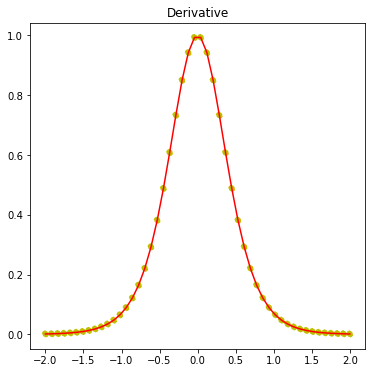

In [35]:
# Exercise 5.15

import numpy as np
import matplotlib.pyplot as plt

a = -2
b = 2
d = b - a
h = 10E-5

def func(x):
    return 1 + 1 / 2 * np.tanh(2 * x)

def der(x, f):
    return x, (f(x + h / 2) - f(x - h/2)) / h

def a_der(x):
    return x,  (1 / np.cosh(2 * x)) ** 2

space = np.linspace(-2, 2)

x_vals, y_vals = der(space, func)
ax_vals, ay_vals = a_der(space)

figure, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.set_title("Derivative")
axes.plot(x_vals, y_vals, c="r")
axes.scatter(ax_vals, ay_vals, linestyle=(1, (5, 5)), c='y')

plt.show()